In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

/home/chester/.local/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

170499072it [00:21, 8004505.33it/s]                                                                             


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


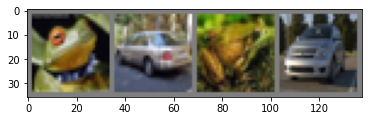

 frog   car  frog   car


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net().to(device)

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.179
[1,  4000] loss: 1.815
[1,  6000] loss: 1.645
[1,  8000] loss: 1.541
[1, 10000] loss: 1.496
[1, 12000] loss: 1.469
[2,  2000] loss: 1.384
[2,  4000] loss: 1.361
[2,  6000] loss: 1.338
[2,  8000] loss: 1.315
[2, 10000] loss: 1.297
[2, 12000] loss: 1.276
[3,  2000] loss: 1.222
[3,  4000] loss: 1.222
[3,  6000] loss: 1.192
[3,  8000] loss: 1.202
[3, 10000] loss: 1.189
[3, 12000] loss: 1.182
[4,  2000] loss: 1.130
[4,  4000] loss: 1.107
[4,  6000] loss: 1.112
[4,  8000] loss: 1.115
[4, 10000] loss: 1.104
[4, 12000] loss: 1.097
[5,  2000] loss: 1.048
[5,  4000] loss: 1.013
[5,  6000] loss: 1.050
[5,  8000] loss: 1.026
[5, 10000] loss: 1.035
[5, 12000] loss: 1.039
[6,  2000] loss: 0.964
[6,  4000] loss: 0.965
[6,  6000] loss: 0.985
[6,  8000] loss: 1.020
[6, 10000] loss: 0.982
[6, 12000] loss: 0.960
[7,  2000] loss: 0.914
[7,  4000] loss: 0.915
[7,  6000] loss: 0.900
[7,  8000] loss: 0.955
[7, 10000] loss: 0.953
[7, 12000] loss: 0.967
[8,  2000] loss: 0.834


In [ ]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))